In [1]:
import matplotlib.pyplot as plt
import pandas as pd

EVALUATION_FOLDER = "evaluation_minbzk"
RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_minbzk_keywords_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_BM25S.csv"
# RESULTS_FILE = "evaluation_minbzk_no_requests_real_words_minbzk_keywords_BM25S.csv"

woo_data = pd.read_csv(f"./{EVALUATION_FOLDER}/results/{RESULTS_FILE}")
minbzk_real_words = pd.read_csv(f"./docs_minbzk/minbzk_no_requests/woo_merged.csv.gz")

In [3]:
results_summary = []
thresholds = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for threshold in thresholds:
    true_count = 0
    false_count = 0
    for index, row in woo_data.iterrows():
        retrieved_page_ids = row["retrieved_page_ids"].split(", ")
        for page in retrieved_page_ids:
            matching_rows = minbzk_real_words.loc[minbzk_real_words['page_id'] == page]
            first_matching_row = matching_rows.iloc[0] if not matching_rows.empty else None

            if matching_rows is None or matching_rows.empty:
                print("[Warning] ~ This should not be possible.")
                continue
            
            if first_matching_row["real_words_percentage"] >= threshold:
                if first_matching_row["dossier_id"] == row["dossier_id"]:
                    true_count += 1
                else:
                    false_count += 1
                break
    results_summary.append({
        'Threshold': threshold,
        'true_count': true_count,
        'false_count': false_count,
        'na_count': 241 - true_count - false_count
    })


In [4]:
results_summary

[{'Threshold': 0.0, 'true_count': 207, 'false_count': 34, 'na_count': 0},
 {'Threshold': 0.1, 'true_count': 206, 'false_count': 35, 'na_count': 0},
 {'Threshold': 0.2, 'true_count': 205, 'false_count': 34, 'na_count': 2},
 {'Threshold': 0.3, 'true_count': 203, 'false_count': 35, 'na_count': 3},
 {'Threshold': 0.4, 'true_count': 201, 'false_count': 36, 'na_count': 4},
 {'Threshold': 0.5, 'true_count': 197, 'false_count': 37, 'na_count': 7},
 {'Threshold': 0.6, 'true_count': 190, 'false_count': 42, 'na_count': 9},
 {'Threshold': 0.7, 'true_count': 182, 'false_count': 44, 'na_count': 15},
 {'Threshold': 0.8, 'true_count': 162, 'false_count': 54, 'na_count': 25},
 {'Threshold': 0.9, 'true_count': 80, 'false_count': 84, 'na_count': 77},
 {'Threshold': 1.0, 'true_count': 0, 'false_count': 0, 'na_count': 241}]

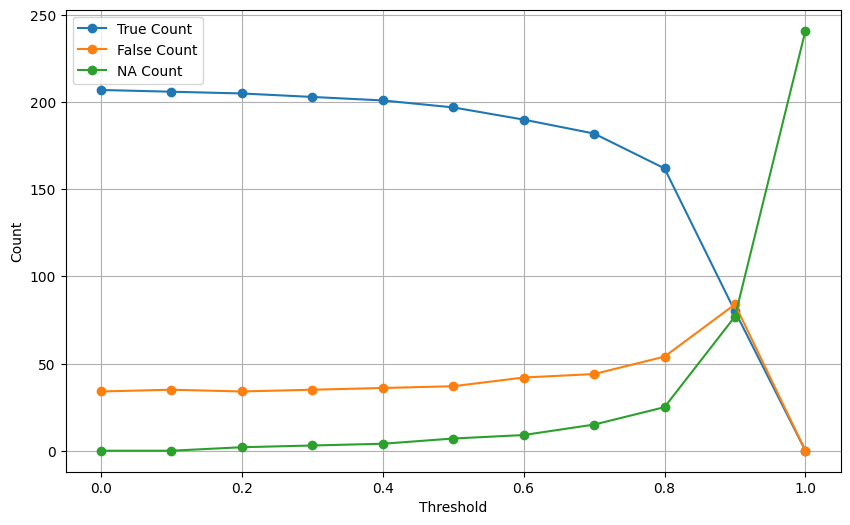

In [6]:
# Extracting values for plotting
thresholds = [item['Threshold'] for item in results_summary]
true_counts = [item['true_count'] for item in results_summary]
false_counts = [item['false_count'] for item in results_summary]
na_counts = [item['na_count'] for item in results_summary]

# Plotting the data
plt.figure(figsize=(10, 6))

plt.plot(thresholds, true_counts, label='True Count', marker='o')
plt.plot(thresholds, false_counts, label='False Count', marker='o')
plt.plot(thresholds, na_counts, label='NA Count', marker='o')

# Adding labels and title
plt.xlabel('Threshold')
plt.ylabel('Count')
# plt.title('Counts vs Threshold')
plt.legend()

# Show plot
plt.grid(True)
plt.show()